In [4]:
import tensorflow as tf
from keras.datasets import cifar10
import ssl

try:
   _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [5]:
(train_features,train_target),(test_features,test_target) = cifar10.load_data()

170500096/170498071 [==============================] - 90s 1us/step


In [7]:
import matplotlib.pyplot as plt

In [8]:
train_features.shape

(50000, 32, 32, 3)

In [9]:
test_features.shape

(10000, 32, 32, 3)

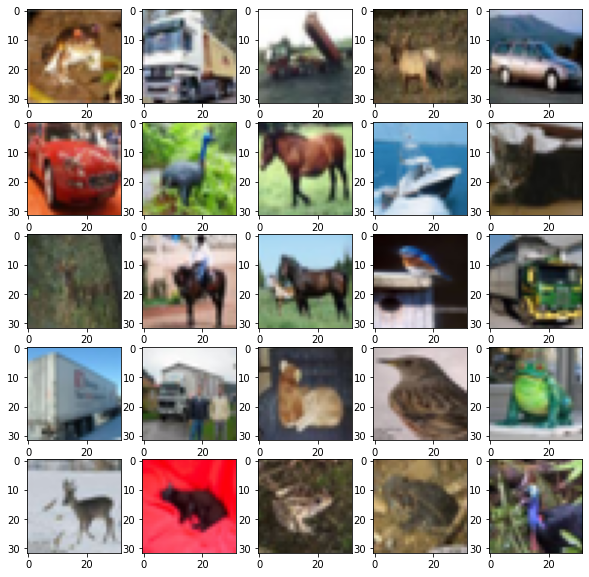

In [11]:
plt.figure(figsize = (10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_features[i])


In [ ]:
0 - airplane
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck


In [14]:
train_target.shape

(50000, 1)

In [13]:
from keras.utils import to_categorical

In [15]:
train_target = to_categorical(train_target)

In [16]:
train_target.shape

(50000, 10)

# Specify the architecture

In [20]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [21]:
from keras.models import Sequential

In [27]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation = "relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation = "relu"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

# Compile the model

In [31]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# Train the model

In [32]:
model.fit(train_features,train_target,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.8407 - accuracy: 0.3194
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3328 - accuracy: 0.5202
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1467 - accuracy: 0.5962
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0244 - accuracy: 0.6429
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9464 - accuracy: 0.6710
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8871 - accuracy: 0.6916
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8293 - accuracy: 0.7107
Epoch 8/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7762 - accuracy: 0.7295
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7371 - accuracy: 0.7440
Epoch 10/10
1563/1563 [==============================] - 46s 30m

# Test the model

In [34]:
results = model.predict(test_features)

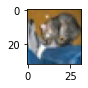

In [37]:
plt.figure(figsize = (1,1))
plt.imshow(test_features[0])

In [38]:
results[0]

array([2.6034720e-03, 2.1763738e-04, 6.3442491e-02, 5.2250612e-01,
       4.9956497e-02, 1.4826789e-01, 2.0738399e-01, 4.4444939e-03,
       9.4886340e-04, 2.2855506e-04], dtype=float32)

In [39]:
import numpy as np

In [40]:
np.argmax(results[0])

3

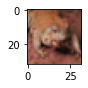

In [41]:
plt.figure(figsize = (1,1))
plt.imshow(test_features[5])

In [42]:
np.argmax(results[5])

6

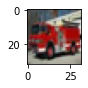

In [43]:
plt.figure(figsize = (1,1))
plt.imshow(test_features[23])

In [44]:
np.argmax(results[23])

9